In [1]:
import numpy as np
from matplotlib import pyplot as plt
import astropy
import scipy

In [27]:
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 17
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.linewidth'] = 1

In [53]:
sun_data, sun_times = np.load('data/1hr_Sun_data.npy')
sun_data = sun_data[50:]
sun_times = sun_times[50:]

In [54]:
crab_data, times = np.load('data/final_data.npy')

In [55]:
crab_data.shape

(63361,)

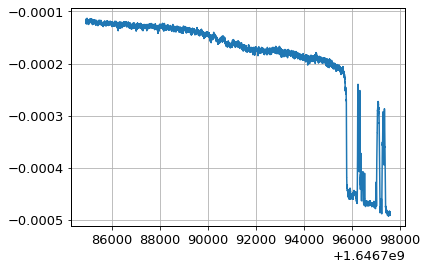

In [56]:
plt.plot(times, crab_data)

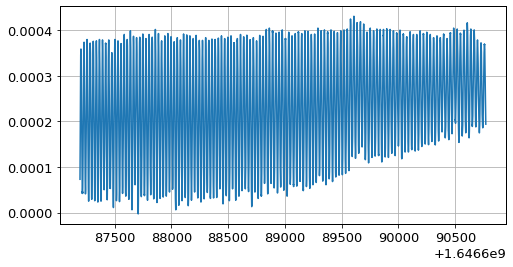

In [57]:
plt.figure(figsize=(8,4))
plt.plot(sun_times, sun_data)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


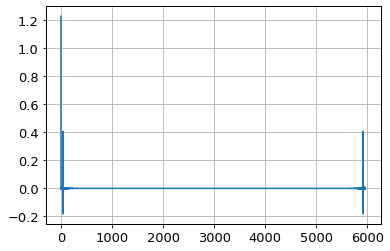

In [58]:
n = len(sun_data)
beginning, beginning_time = sun_data[:n//3], sun_times[:n//3]
middle, middle_time = sun_data[n//3:2*n//3], sun_times[n//3:2*n//3]
end, end_time = sun_data[2*n//3:], sun_times[2*n//3:]
beginning_fft = np.fft.fft(beginning)
plt.plot(beginning_fft)

In [59]:
def pow_fft(arr):
    return np.fft.fftshift(np.abs(np.fft.fft(arr))**2)

def freq(arr, dt):
    return np.fft.fftshift(np.fft.fftfreq(len(arr), dt))

(0, 0.25)

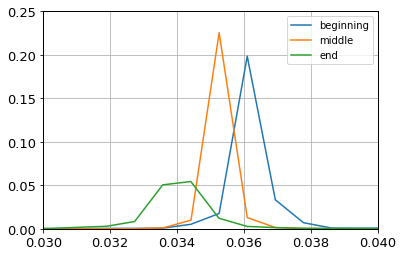

In [73]:
beginning_freq = freq(beginning_time, dt)
middle_freq = freq(middle_time, dt)
end_freq = freq(end_time, dt)

pow_beginning = pow_fft(beginning)
pow_middle = pow_fft(middle) 
pow_end = pow_fft(end) 

plt.plot(beginning_freq, pow_beginning, label="beginning")
plt.plot(middle_freq, pow_middle, label='middle')
plt.plot(end_freq, pow_end, label='end')
plt.legend()
plt.xlim(0.03,0.04)
# plt.xlim(0.0,0.1)
plt.ylim(0,0.25)

In [65]:
sun_times[1] - sun_times[0]

0.20022296905517578

In [68]:
dt = np.mean(np.diff(sun_times))